## Project 4 Maxwell Boltzmann Distribution

Due Wed Nov 24, 9am

In [1]:
# Main code and animation here
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from itertools import combinations
from IPython.display import HTML
import matplotlib
from scipy.optimize import curve_fit

"""
This cell simulates the motion of gas particles which start with
identical velocities, half to the right and half to the left. It
also accounts for the particles colliding with eachother. It then
produces an animation of the particles' postion evolution in time.
Finally, it keeps track of each particle's speed to be used in
other cells.
"""

npoint = 400  # number of particles
nframe = 500
xmin, xmax, ymin, ymax = 0, 1, 0, 1
Dt = 0.00002  # time step
r = 0.0015  # particle radius in m
# used to read particles in dd (indices of respective particles)
a = np.arange(npoint)
a = np.asarray(list(combinations(a, 2)))

# FUNCTIONS ============


def update_point(num):
    """
    This function updates the position and velocity of each particle in the
    sytem. For any particles that collide in the given frame (are seperated by
    less than twice their radii), new velocities are found based on their
    collision. For any particles that will not collide, velocity remains the
    same. Any particles that reach the edge of the box bounce off of it and
    velocity is found based off of this. All collisions are assumed to be
    elastic. Posistion is updated based on the velocity of the particle.

    INPUTS:
        num (integer): the current frame

    OUTPUT:
        N/A
    """
    global x, y, vx, vy, a
    # provide some feedback so the user can see progress
    print('.', end='')
    for i in range(2):
        # folowing 4 update position of all particles based on velocities
        dx = Dt*vx
        dy = Dt*vy
        x = x + dx
        y = y + dy
        # locates particles that reach edges of box
        indx = np.where((x < xmin) | (x > xmax))
        indy = np.where((y < ymin) | (y > ymax))
        # reverses x and/or y velocity depending on edge reached
        vx[indx] = -vx[indx]
        vy[indy] = -vy[indy]
        # all pairs of particles' x coordinates
        xx = np.asarray(list(combinations(x, 2)))
        # all pairs of particles' y coordinates
        yy = np.asarray(list(combinations(y, 2)))
        # Distances between particles:
        dd = (xx[:, 0] - xx[:, 1])**2 + (yy[:, 0] - yy[:, 1])**2

        # indices of particle pairs that collide
        coll_inds = np.where(dd < 4*r**2)[0]
        # colliding particle indices and corresponding seperation distance
        p_inds = a[coll_inds]
        coll_dds = dd[coll_inds]
        # in a collision there we name a particle 1 and a particles 2
        # these are their indices
        p1s = p_inds[:, 0]
        p2s = p_inds[:, 1]

        # COLLISION CALCULATIONS

        # x seperation of particles
        delx = x[p1s] - x[p2s]
        # y seperation of particles
        dely = y[p1s] - y[p2s]
        # x velocity difference of particles
        delvx = vx[p1s] - vx[p2s]
        # x velocity difference of particles
        delvy = vy[p1s] - vy[p2s]
        """
        speed vector difference dotted with position vector difference
        divided by modulus squared of position difference.
        differences are between p1 and p2. vtos - vector to scalar
        """
        vtos = (delvx*delx + delvy*dely)/coll_dds
        # updated velocity components of colliding particles, + for p2s
        # from using p1 - p2 and switching signs instead of p2 - p1 for
        # code efficiency
        vx[p1s] = vx[p1s] - vtos*delx
        vx[p2s] = vx[p2s] + vtos*delx
        vy[p1s] = vy[p1s] - vtos*dely
        vy[p2s] = vy[p2s] + vtos*dely

        # updates the images in the plot
        data = np.stack((x, y), axis=-1)
        im.set_offsets(data)


# PROBLEM SOLUTION ==========

# creates the box on which the particles appear on
fig, ax = plt.subplots()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# defines initial random positions of particles
x = np.random.random(npoint)
y = np.random.random(npoint)
# defines initial veolcitiesfor particles
vx = -500.*np.ones(npoint)
vy = np.zeros(npoint)
# gives particles right of centre and negative (left) velocity
vx[np.where(x <= 0.5)] = -vx[np.where(x <= 0.5)]

# array of colours so particles left of centre
# are red, and those right of centre are blue
cols = np.full(npoint, "r")
cols[x < 0.5] = "b"

# visual representation of particles with defined colours applied
im = ax.scatter(x, y, c=cols)
im.set_sizes([20])

# creates the animation of the particles evolution through time
anim = animation.FuncAnimation(fig, update_point, nframe,
                               interval=30, repeat=False)

anim.save('collide.webm', extra_args=['-vcodec', 'libvpx'])
plt.close()

HTML('<video controls autoplay> <source src="collide.webm" '
     + 'type="video/webm"></video>')

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

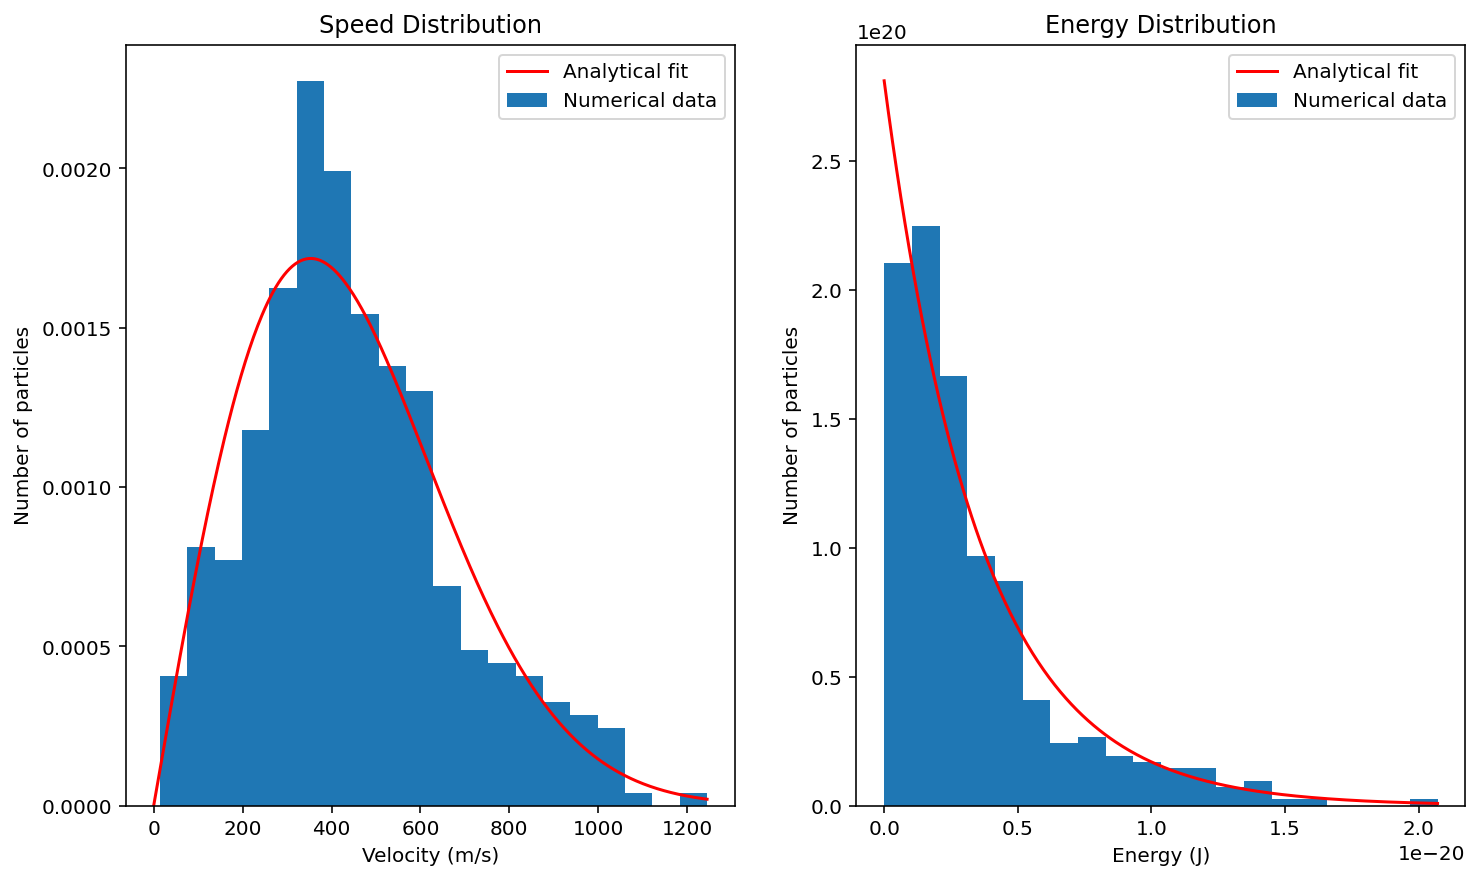

The temperature of this systemis 249.744 degrees kelvin.


In [2]:
# Plots, fits and print temperature here
# CONSTANTS ==========
k = 1.38E-23   # Boltzmann constant in kg/s^2K
m = 2.672E-26  # mass of an O2 molecule
T_guess = 200  # initial temperature guess for curve_fit
nbins = int(np.sqrt(npoint))  # number of bins for histograms


"""
Using the final velocities after the evolution from the previous cell, create
a histogram of the speed and energy distribution of the particles. Energy is
found with E = 1/2mv^2. Using these histograms and the analytical formulas for
the Maxwell-Boltzmann distribution of speed and the Boltzmann distribution of
energy, fit a curve to each distribution with it's respective equation. From
the best fit line determine the temperature of the system.
"""

# FUNCTIONS ==========


def speed_dist(v, T):
    """
    This function is the equation for the Maxwell-Boltzmann distribution of
    speed.

    INPUTS:
        v (float) = speed of a particle
        T (float) = temperature of the system

    OUTPUTS:
       (float) = the result of the Maxwell-Boltzmann distribution of speed
    """
    return (m*v)/(k*T)*np.exp((-m*v**2)/(2*k*T))


def boltz_dist(E, T):
    """
    This function is the equation for the Boltzmann distribution of energy.

    INPUTS:
        E (float) = Energy of a particle (by E = 1/2mv^2)
        T (float) = temperature of the system

    OUTPUTS:
       (float) = the result of the Boltzmann distribution of energy
    """
    return 1/(k*T)*np.exp(-E/(k*T))


# magnitude of final velocity vectors of each particle (array of floats)
vfAF = np.sqrt(vx**2 + vy**2)
# final enregy of each particle (array of floats)
EAF = 1/2*m*vfAF**2

# PLOTTING HISTOGRAMS ===========

# histogram of speed distribustion (sd)
plt.subplot(121)
# n_sd = histogram bar heights, bins_sd = histogram edge location
n_sd, bins_sd, p_sd = plt.hist(vfAF, nbins,
                               density=True, label="Numerical data")

# histogram of energy distribution (ed)
plt.subplot(122)
# n_ed = histogram bar heights, bins_ed = histogram bin edge location
n_ed, bins_ed, p_ed = plt.hist(EAF, nbins,
                               density=True, label="Numerical data")


# PLOTTING BEST FIT LINES =======

# evenly spaced velocities and energies for calculation of best fit line
v_analytic = np.linspace(0, np.max(vfAF), npoint)
e_analytic = np.linspace(0, np.max(EAF), npoint)

# best fit line for speed distribution, x values are locations of the middles
# of the histogram bins. Provides value for T.
sd_param, sd_cov = curve_fit(speed_dist, (bins_sd[0:-1] + bins_sd[1:])/2,
                             n_sd, (T_guess, ))
# calculates Maxwell-Boltzmann distribution of speed with best fit T parameter
p_fitsd = speed_dist(v_analytic, sd_param[0])

# best fit line for energy distribution, x values are locations of the middles
# of the histogram bins. Provides value for T.
ed_param, ed_cov = curve_fit(boltz_dist, (bins_ed[0:-1] + bins_ed[1:])/2,
                             n_ed, (T_guess, ))
# calculates Boltzmann distribution of energy with best fit T parameter
p_fited = boltz_dist(e_analytic, ed_param[0])

# plot best fit line for speed distribution
plt.subplot(121)
plt.plot(v_analytic, p_fitsd, 'r', label="Analytical fit")

plt.title('Speed Distribution')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Number of particles')
plt.legend()

# plot best fit line for energy distribution
plt.subplot(122)
plt.plot(e_analytic, p_fited, 'r', label="Analytical fit")

plt.title('Energy Distribution')
plt.xlabel('Energy (J)')
plt.ylabel('Number of particles')
plt.legend()

plt.show()

# finds average of the determined T values
ave_T = (ed_param[0] + sd_param[0])/2

print("The temperature of this system"
      "is {:3.3f} degrees kelvin.".format(ave_T))

# Acknowledgements
Please describe the role of **anyone other than yourself** who contributed to the work shown in this notebook. 

Its ok to get help from us and classmates! Please get in the habit of acknowledging such contributions.

If you want to refer to a classmate, please use only their cocalc email-id and not their name - or you could just say something like: "a classmate gave me the idea to use xxx feature to solve yyy problem."

Mercedes and Shannon helped me to understand and format the v' equations


All solution code for the main project question should appear above this cell.
Project extensions should appear in the cell below.

In [3]:
# OPTIONAL project extension (which can call functions in your code above if desired) here.
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

# Extension Description

Please describe any new language features or project extension you have implemented in this cell.



Code executes - grader use only

YOUR ANSWER HERE

In [4]:
# pep8 returns warnings or errors
nb_name = "project4.ipynb"
cells_to_check = []
cells_to_exclude = ['cell-style', 'cell-optimization0']
stop_at = ['cell-extension']

# check_style.py uses cells_to_check and nb_name
%run -i check_style2.py


checking cell: cell-p5-1
checking cell: cell-p5-2


<Figure size 864x504 with 0 Axes>

Results Grade - grader use only

YOUR ANSWER HERE

Comments, naming, readability - grader use only

YOUR ANSWER HERE

Plots - grader use only

YOUR ANSWER HERE

Code compactness and organization - grader use only

YOUR ANSWER HERE

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

Time for cell: cell-p5-1 time: 176.20


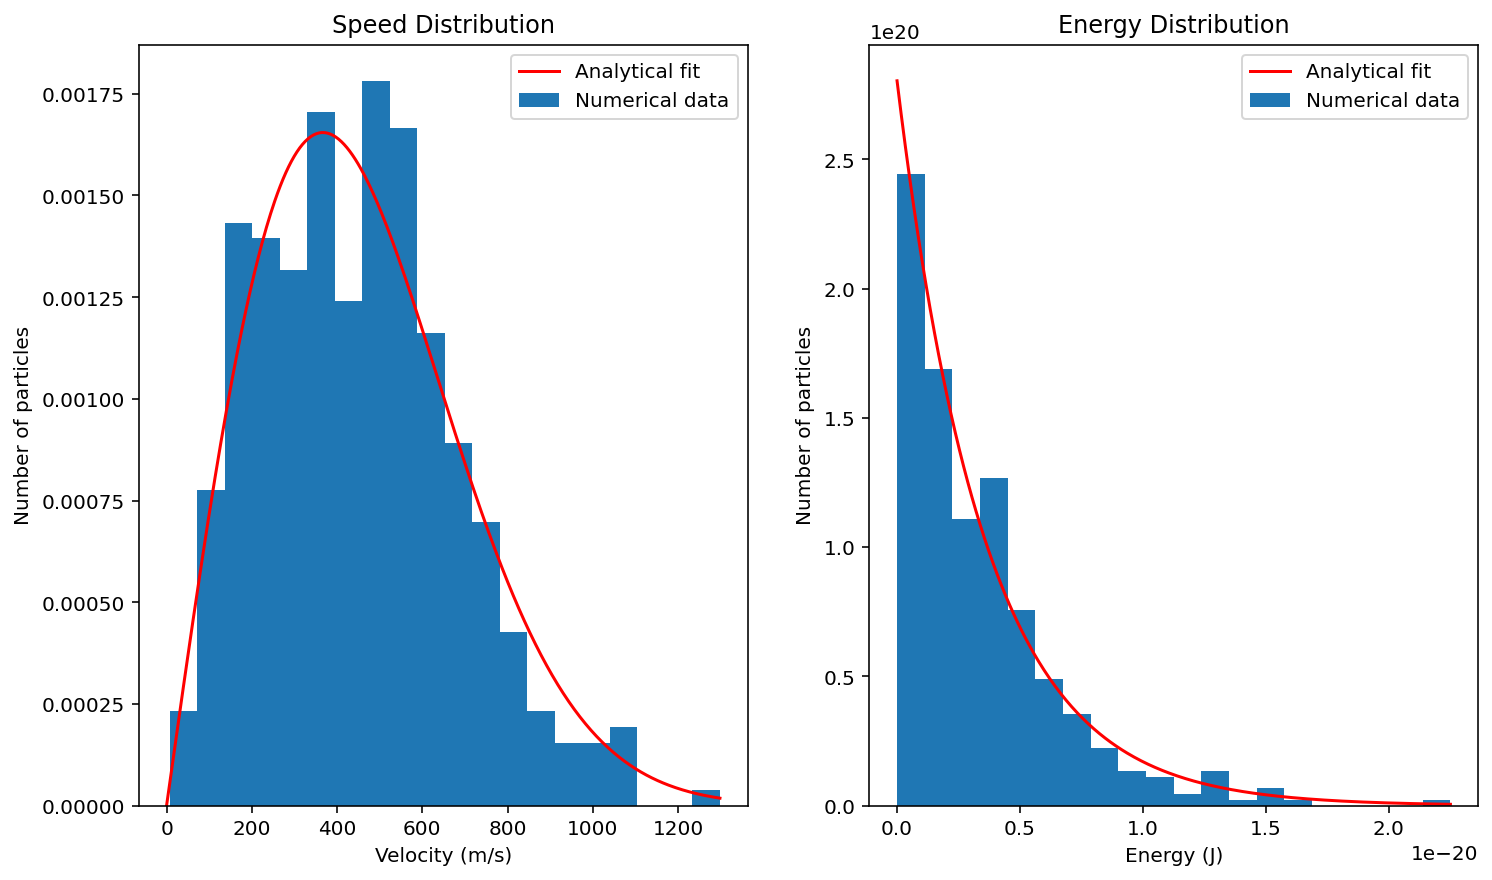

The temperature of this systemis 259.285 degrees kelvin.
Time for cell: cell-p5-2 time: 0.65
Total time: 176.85


<Figure size 864x504 with 0 Axes>

In [5]:
# Code optimization/speed
cells_to_time = []
cells_to_exclude = ['cell-style', 'cell-optimization0']
stop_at = ['cell-extension']
# also uses nb_name
%run -i time_cells2.py

Code optimization/timing - grader use only

YOUR ANSWER HERE

New Functionality/Language features - grader use only

YOUR ANSWER HERE